# neuralthreads
[medium](https://neuralthreads.medium.com/i-was-not-satisfied-by-any-deep-learning-tutorials-online-37c5e9f4bea1)

## Chapter 5 — Diving Deep in the Neural Networks

*Backpropagation — Made super easy for you, Part 1*

This is the post you all have been waiting for. In this post, we will go through Backpropagation, the most complex thing in Deep Learning but it is actually very simple if done in an organized manner. After this post, you will never look at Backpropagation the same way you did before. I guarantee.

At the end of this post, we will learn to calculate gradients via a game called ‘Jumping Back’ which will have some rules. This game will help you to visualize how Backpropagation works and how simple and easy Backpropagation actually is.

> Note — This post uses many things from the previous chapters. It is recommended that you have a look at the previous posts.

### 5.2.1 Backpropagation in ANNs — Part 1

In this post, we will learn how to use Backpropagation to calculate gradients which we will use to update weights and biases to reduce the loss via some Optimizer.

> Note — The architecture of the Neural Network is the same as it was in the previous post, i.e., 4 layers with 5, 3, 5, and 4 nodes.

Before going forward, a few things first:  
**First**, the activation function for the first hidden layer is ReLU with leak = 0.1  
**Second**, the activation function for the second hidden layer and the output layer is the Sigmoid function.  
**Third**, the loss function used is Mean Square Error, MSE  
**Fourth**, We will use SGD Optimizer with a learning rate = 0.01 

![our nn](image-32.png)

Now, let us look at the steps which we will do here

> Step 1 - A forward feed like we did in the previous post  
> Step 2 - Initializing SGD Optimizer  
> Step 3 - Entering the training loop  
>   Step 3.1 - A forward feed to see loss before training  
>   Step 3.2 - Using Backpropagation to calculate gradients  
>   Step 3.3 - Using SGD Optimizer to update weights and biases  
> Step 4 - A forward feed to verify that the loss has been reduced and to see how close predicted values are to true values  

Let us do it in Python.

### Step 1 — A forward feed like we did in the previous post

In [298]:
import numpy as np                          # importing NumPy
np.random.seed(42)

input_nodes = 5                             # nodes in each layer
hidden_1_nodes = 3
hidden_2_nodes = 5
output_nodes = 4

Inputs and true outputs

In [299]:
x = np.random.randint(1, 100, size = (input_nodes, 1)) / 100
x                            # Inputs

array([[0.52],
       [0.93],
       [0.15],
       [0.72],
       [0.61]])

In [300]:
y = np.random.randint(1, 100, size = (output_nodes, 1)) / 100
y                              # Outputs

array([[0.21],
       [0.83],
       [0.87],
       [0.75]])

This time along with the activation functions and the loss function, we will also define their derivatives.

In [301]:
def relu(x, leak = 0):                      # ReLU
    return np.where(x <= 0, leak * x, x)

def relu_dash(x, leak = 0):                 # ReLU derivative
    return np.where(x <= 0, leak, 1)

def sig(x):                                 # Sigmoid
    return 1/(1 + np.exp(-x))

def sig_dash(x):                            # Sigmoid derivative
    return sig(x) * (1 - sig(x))

def mse(y_true, y_pred):                    # MSE
    return np.mean((y_true - y_pred)**2)

def mse_grad(y_true, y_pred):               # MSE derivative    
    N = y_true.shape[0]    
    return -2*(y_true - y_pred)/N

Random initialization of weights and biases

In [302]:
w1 = np.random.random(size = (hidden_1_nodes, input_nodes))    # w1
b1 = np.zeros(shape = (hidden_1_nodes, 1))                     # b1

w2 = np.random.random(size = (hidden_2_nodes, hidden_1_nodes)) # w2
b2 = np.zeros(shape = (hidden_2_nodes, 1))                     # b2

w3 = np.random.random(size = (output_nodes, hidden_2_nodes))   # w3
b3 = np.zeros(shape = (output_nodes, 1))                       # b3

Forward feed before training

In [303]:
in_hidden_1 = w1.dot(x) + b1                      # forward feed
out_hidden_1 = relu(in_hidden_1, leak = 0.1)
in_hidden_2 = w2.dot(out_hidden_1) + b2
out_hidden_2 = sig(in_hidden_2)
in_output_layer = w3.dot(out_hidden_2) + b3
y_hat = sig(in_output_layer)
print(y_hat)                                             # y_hat
print(y)                                                 # y
mse(y, y_hat)                                     # MSE loss

[[0.83237553]
 [0.89655717]
 [0.87337397]
 [0.92904704]]
[[0.21]
 [0.83]
 [0.87]
 [0.75]]


0.1059625955371147

### Step 2 — Initializing SGD Optimizer

In [304]:
learning_rate = 0.01

### Step 3 — Entering training loop

We will call the training loops ‘epochs’. We will have 10,000 trainig loops.

Total number of epochs

In [305]:
epochs = 10000

### Step 3.1 — A forward feed to see loss before training

We will print loss before training every time to see that it is reducing after each training epoch.

In [306]:
for epoch in range(epochs):
#----------------------Forward Propagation--------------------------
    
    in_hidden_1 = w1.dot(x) + b1
    out_hidden_1 = relu(in_hidden_1, leak = 0.1)
    in_hidden_2 = w2.dot(out_hidden_1) + b2
    out_hidden_2 = sig(in_hidden_2)
    in_output_layer = w3.dot(out_hidden_2) + b3
    y_hat = sig(in_output_layer)
    
    loss = mse(y, y_hat)
    print(f'loss before training is {loss} -- epoch number {epoch + 1}')
    print('\n')

loss before training is 0.1059625955371147 -- epoch number 1


loss before training is 0.1059625955371147 -- epoch number 2


loss before training is 0.1059625955371147 -- epoch number 3


loss before training is 0.1059625955371147 -- epoch number 4


loss before training is 0.1059625955371147 -- epoch number 5


loss before training is 0.1059625955371147 -- epoch number 6


loss before training is 0.1059625955371147 -- epoch number 7


loss before training is 0.1059625955371147 -- epoch number 8


loss before training is 0.1059625955371147 -- epoch number 9


loss before training is 0.1059625955371147 -- epoch number 10


loss before training is 0.1059625955371147 -- epoch number 11


loss before training is 0.1059625955371147 -- epoch number 12


loss before training is 0.1059625955371147 -- epoch number 13


loss before training is 0.1059625955371147 -- epoch number 14


loss before training is 0.1059625955371147 -- epoch number 15


loss before training is 0.1059625955371147 -- epo

### Step 3.2 — Calculating gradients via Backpropagation

Now, the question is how to update weights and biases.

For example, take weight w3₁₁
If we can calculate

In [307]:
%%latex

\begin{gather*}
    \frac{\partial loss}{\partial W3_{11}} \\
    \\
    \begin{align*}
        \text{Then we can use SGD Optimizer to update it like this.} \\
    \end{align*}
    \\
    W3_{11} \, += -lr \ast \frac{\partial loss}{\partial W3_{11}} \\
    \\
    \begin{align*}
        \text{Or we can do even better.} \\
        \text{For every weight in w3, we can do this} \\

    \end{align*} \\
    \\
    \newcommand{\arraystretch}{2}
    \begin{bmatrix*}
        W3_{11} & W3_{21} & W3_{31} & W3_{41} & W3_{51}\\
        W3_{12} & W3_{22} & W3_{32} & W3_{42} & W3_{52} \\
        W3_{13} & W3_{23} & W3_{33} & W3_{43} & W3_{53} \\
        W3_{14} & W3_{24} & W3_{34} & W3_{44} & W3_{54} \\ 
    \end{bmatrix*} += 
    \begin{bmatrix*}
        \frac{\partial loss}{\partial W3_{11}} & \frac{\partial loss}{\partial W3_{21}} & \frac{\partial loss}{\partial W3_{31}} & \frac{\partial loss}{\partial W3_{41}} & \frac{\partial loss}{\partial W3_{51}}\\
        \frac{\partial loss}{\partial W3_{12}} & \frac{\partial loss}{\partial W3_{22}} & \frac{\partial loss}{\partial W3_{32}} & \frac{\partial loss}{\partial W3_{42}} & \frac{\partial loss}{\partial W3_{52}} \\
        \frac{\partial loss}{\partial W3_{13}} & \frac{\partial loss}{\partial W3_{23}} & \frac{\partial loss}{\partial W3_{33}} & \frac{\partial loss}{\partial W3_{43}} & \frac{\partial loss}{\partial W3_{53}} \\
        \frac{\partial loss}{\partial W3_{14}} & \frac{\partial loss}{\partial W3_{24}} & \frac{\partial loss}{\partial W3_{34}} & \frac{\partial loss}{\partial W3_{44}} & \frac{\partial loss}{\partial W3_{54}} \\ 
    \end{bmatrix*}
    \\
    \begin{align*}
        \text{It can be rearranged as} \\
    \end{align*}
    \\
    W3 \, \mathrel{+}= update\_W3 \\
    update\_W3 = -lr \ast grad\_W3
    \\
    \begin{align*}
        \text{where} \\
    \end{align*}
    \\
    \newcommand{\arraystretch}{2}
    grad\_W3 = 
    \begin{bmatrix*}
        \frac{\partial loss}{\partial W3_{11}} & \frac{\partial loss}{\partial W3_{21}} & \frac{\partial loss}{\partial W3_{31}} & \frac{\partial loss}{\partial W3_{41}} & \frac{\partial loss}{\partial W3_{51}}\\
        \frac{\partial loss}{\partial W3_{12}} & \frac{\partial loss}{\partial W3_{22}} & \frac{\partial loss}{\partial W3_{32}} & \frac{\partial loss}{\partial W3_{42}} & \frac{\partial loss}{\partial W3_{52}} \\
        \frac{\partial loss}{\partial W3_{13}} & \frac{\partial loss}{\partial W3_{23}} & \frac{\partial loss}{\partial W3_{33}} & \frac{\partial loss}{\partial W3_{43}} & \frac{\partial loss}{\partial W3_{53}} \\
        \frac{\partial loss}{\partial W3_{14}} & \frac{\partial loss}{\partial W3_{24}} & \frac{\partial loss}{\partial W3_{34}} & \frac{\partial loss}{\partial W3_{44}} & \frac{\partial loss}{\partial W3_{54}} \\ 
    \end{bmatrix*}
    \\
    \begin{align*}
        \text{Let us start by finding the first term, i.e.,} \\
    \end{align*}
    \\
    \frac{\partial loss}{\partial W3_{11}} \\
    \\
    \begin{align*}
        \text{We know that,} \\
    \end{align*}
    \\
    loss = mse \\
    \\
    \begin{align*}
        \text{and} \\
    \end{align*}
\end{gather*}

<IPython.core.display.Latex object>

In [308]:
%%latex
\begin{gather*}
    mse = f(\hat{y_1}, \hat{y_2}, \hat{y_3}, \hat{y_4}) \\
        \\
    \begin{align*}
        \text{So we can wrighte} \\
    \end{align*}
    \\
    \\
    \frac{\partial loss}{\partial W3_{11}} = \frac{\partial mse}{\partial W3_{11}}\\
    \\
    \frac{\partial loss}{\partial W3_{11}} = \frac{\partial mse}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial W3_{11}} + 
                                             \frac{\partial mse}{\partial \hat{y_2}} \cdot \frac{\partial \hat{y_2}}{\partial W3_{11}} +  
                                             \frac{\partial mse}{\partial \hat{y_3}} \cdot \frac{\partial \hat{y_3}}{\partial W3_{11}} +  
                                             \frac{\partial mse}{\partial \hat{y_4}} \cdot \frac{\partial \hat{y_4}}{\partial W3_{11}} \\

    \\
    \begin{align*}
        \text{We also know that,} \\
    \end{align*}
    \\
    \hat{y_1} = f(I\_OL_1) \\
    \hat{y_2} = f(I\_OL_2) \\
    \hat{y_3} = f(I\_OL_3) \\
    \hat{y_4} = f(I\_OL_4) \\
    \\
    \begin{align*}
        \text{So, we can write,} \\
    \end{align*}
    \\
    \frac{\partial loss}{\partial W3_{11}} = \frac{\partial mse}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial I\_OL_1} \cdot \frac{\partial I\_OL_1}{\partial W3_{11}} + 
                                             \frac{\partial mse}{\partial \hat{y_2}} \cdot \frac{\partial \hat{y_2}}{\partial I\_OL_2} \cdot \frac{\partial I\_OL_2}{\partial W3_{11}} + 
                                             \frac{\partial mse}{\partial \hat{y_3}} \cdot \frac{\partial \hat{y_3}}{\partial I\_OL_3} \cdot \frac{\partial I\_OL_3}{\partial W3_{11}} + 
                                             \frac{\partial mse}{\partial \hat{y_4}} \cdot \frac{\partial \hat{y_4}}{\partial I\_OL_4} \cdot \frac{\partial I\_OL_4}{\partial W3_{11}} \\

    \\
    \begin{align*}
        \text{We also know that,} \\
    \end{align*}
    \\
    I\_OL_1 = O\_H2_1 \cdot W3_{11} + O\_H2_2 \cdot W3_{21} + O\_H2_3 \cdot W3_{31} + O\_H2_4 \cdot W3_{41} + O\_H2_5 \cdot W3_{51} + B3_1  \\
        \\
    I\_OL_2 = O\_H2_1 \cdot W3_{12} + O\_H2_2 \cdot W3_{22} + O\_H2_3 \cdot W3_{32} + O\_H2_4 \cdot W3_{42} + O\_H2_5 \cdot W3_{52} + B3_2  \\
        \\
    I\_OL_3 = O\_H2_1 \cdot W3_{13} + O\_H2_2 \cdot W3_{23} + O\_H2_3 \cdot W3_{33} + O\_H2_4 \cdot W3_{43} + O\_H2_5 \cdot W3_{53} + B3_3  \\
        \\
    I\_OL_4 = O\_H2_1 \cdot W3_{14} + O\_H2_2 \cdot W3_{24} + O\_H2_3 \cdot W3_{34} + O\_H2_4 \cdot W3_{44} + O\_H2_5 \cdot W3_{54} + B3_4   \\
    \\
    \\
    \begin{align*}
        \text{So these terms are 0 (Zero)} \\
    \end{align*}
    \\
    \frac{\partial loss}{\partial W3_{11}} = \frac{\partial mse}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial I\_OL_1} \cdot \frac{\partial I\_OL_1}{\partial W3_{11}} + 
                                             \frac{\partial mse}{\partial \hat{y_2}} \cdot \frac{\partial \hat{y_2}}{\partial I\_OL_2} \cdot \color{red} \frac{\partial I\_OL_2}{\partial W3_{11}} \color{white} + 
                                             \frac{\partial mse}{\partial \hat{y_3}} \cdot \frac{\partial \hat{y_3}}{\partial I\_OL_3} \cdot \color{red} \frac{\partial I\_OL_3}{\partial W3_{11}} \color{white} + 
                                             \frac{\partial mse}{\partial \hat{y_4}} \cdot \frac{\partial \hat{y_4}}{\partial I\_OL_4} \cdot \color{red} \frac{\partial I\_OL_4}{\partial W3_{11}} \color{white}\\
    \\
    \begin{align*}
        \text{We have} \\
    \end{align*}
    \\
    \frac{\partial loss}{\partial W3_{11}} = \frac{\partial mse}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial I\_OL_1} \cdot \frac{\partial I\_OL_1}{\partial W3_{11}} \\
    \\
    \begin{align*}
        \text{or} \\
    \end{align*}
    \\
    \frac{\partial loss}{\partial W3_{11}} = \frac{\partial mse}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial I\_OL_1} \cdot O\_H2_1 \\
    \\
    \begin{align*}
        \text{Like this, we can find every term in grad\_w3} \\
    \end{align*}
    \\
    \newcommand{\arraystretch}{2}
    grad\_W3 = 
    \begin{bmatrix*}
        \frac{\partial mse}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial I\_OL_1} \cdot O\_H2_1 
            & \frac{\partial mse}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial I\_OL_1} \cdot O\_H2_2 
            & \frac{\partial mse}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial I\_OL_1} \cdot O\_H2_3 
            & \frac{\partial mse}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial I\_OL_1} \cdot O\_H2_4 
            & \frac{\partial mse}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial I\_OL_1} \cdot O\_H2_5 \\
        \frac{\partial mse}{\partial \hat{y_2}} \cdot \frac{\partial \hat{y_2}}{\partial I\_OL_2} \cdot O\_H2_1 
            & \frac{\partial mse}{\partial \hat{y_2}} \cdot \frac{\partial \hat{y_2}}{\partial I\_OL_2} \cdot O\_H2_2 
            & \frac{\partial mse}{\partial \hat{y_2}} \cdot \frac{\partial \hat{y_2}}{\partial I\_OL_2} \cdot O\_H2_3 
            & \frac{\partial mse}{\partial \hat{y_2}} \cdot \frac{\partial \hat{y_2}}{\partial I\_OL_2} \cdot O\_H2_4 
            & \frac{\partial mse}{\partial \hat{y_2}} \cdot \frac{\partial \hat{y_2}}{\partial I\_OL_2} \cdot O\_H2_5 \\
        \frac{\partial mse}{\partial \hat{y_3}} \cdot \frac{\partial \hat{y_3}}{\partial I\_OL_3} \cdot O\_H2_1 
            & \frac{\partial mse}{\partial \hat{y_3}} \cdot \frac{\partial \hat{y_3}}{\partial I\_OL_3} \cdot O\_H2_2 
            & \frac{\partial mse}{\partial \hat{y_3}} \cdot \frac{\partial \hat{y_3}}{\partial I\_OL_3} \cdot O\_H2_3 
            & \frac{\partial mse}{\partial \hat{y_3}} \cdot \frac{\partial \hat{y_3}}{\partial I\_OL_3} \cdot O\_H2_4 
            & \frac{\partial mse}{\partial \hat{y_3}} \cdot \frac{\partial \hat{y_3}}{\partial I\_OL_3} \cdot O\_H2_5 \\
        \frac{\partial mse}{\partial \hat{y_4}} \cdot \frac{\partial \hat{y_4}}{\partial I\_OL_4} \cdot O\_H2_1 
            & \frac{\partial mse}{\partial \hat{y_4}} \cdot \frac{\partial \hat{y_4}}{\partial I\_OL_4} \cdot O\_H2_2 
            & \frac{\partial mse}{\partial \hat{y_4}} \cdot \frac{\partial \hat{y_4}}{\partial I\_OL_4} \cdot O\_H2_3 
            & \frac{\partial mse}{\partial \hat{y_4}} \cdot \frac{\partial \hat{y_4}}{\partial I\_OL_4} \cdot O\_H2_4
            & \frac{\partial mse}{\partial \hat{y_4}} \cdot \frac{\partial \hat{y_4}}{\partial I\_OL_4} \cdot O\_H2_5 \\ 
    \end{bmatrix*} \\
    \\
    \begin{align*}
        \text{We can reduce it like this} \\
    \end{align*}
    \\
    \newcommand{\arraystretch}{2}
    grad\_W3 = 
    \begin{bmatrix*}
        \frac{\partial mse}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial I\_OL_1} \\
        \frac{\partial mse}{\partial \hat{y_2}} \cdot \frac{\partial \hat{y_2}}{\partial I\_OL_2} \\
        \frac{\partial mse}{\partial \hat{y_3}} \cdot \frac{\partial \hat{y_3}}{\partial I\_OL_3} \\
        \frac{\partial mse}{\partial \hat{y_4}} \cdot \frac{\partial \hat{y_4}}{\partial I\_OL_4} \\ 
    \end{bmatrix*} \cdot 
    \begin{bmatrix*}
        O\_H2_1 &
        O\_H2_2 &
        O\_H2_3 &
        O\_H2_4 &
        O\_H2_5
    \end{bmatrix*} \\
    \\
    \newcommand{\arraystretch}{2}
    grad\_W3 = 
    \begin{bmatrix*}
        \frac{\partial mse}{\partial \hat{y_1}} \\
        \frac{\partial mse}{\partial \hat{y_2}} \\
        \frac{\partial mse}{\partial \hat{y_3}} \\
        \frac{\partial mse}{\partial \hat{y_4}} \\ 
    \end{bmatrix*} *
    \begin{bmatrix*}
        \frac{\partial \hat{y_1}}{\partial I\_OL_1} \\
        \frac{\partial \hat{y_2}}{\partial I\_OL_2} \\
        \frac{\partial \hat{y_3}}{\partial I\_OL_3} \\
        \frac{\partial \hat{y_4}}{\partial I\_OL_4} \\ 
    \end{bmatrix*} \cdot 
    \begin{bmatrix*}
        O\_H2_1 &
        O\_H2_2 &
        O\_H2_3 &
        O\_H2_4 &
        O\_H2_5
    \end{bmatrix*} \\
    \\
    \begin{align*}
        \text{And, finally, we have} \\
    \end{align*}
    \\
    grad\_W3 = (mse\_grad(y, \hat{y}) * sig\_dash(I\_OL)) \cdot O\_H2^{T}


\end{gather*}

<IPython.core.display.Latex object>

In a single line, we have calculated all the gradients for weights in **w3**. Backpropagation is very simple when done in an organized fashion.

Similarly, like this, we can calculate the gradients for **b3**

In [309]:
%%latex
\begin{gather*}
    B3_1 \mathrel{+}= - lr * \frac{\partial mse}{\partial B3_{1}} \\
    \begin{align*}
        \\
        \text{Or, for every bias in b3, we can do this}
        \\
    \end{align*} \\
    \newcommand{\arraystretch}{2}
    \begin{bmatrix*}
        B3_1 \\
        B3_2 \\
        B3_3 \\
        B3_4 
    \end{bmatrix*} \mathrel{+}= - lr * 
    \begin{bmatrix*}
        \frac{\partial loss}{\partial B3_1} \\
        \frac{\partial loss}{\partial B3_2} \\
        \frac{\partial loss}{\partial B3_3} \\
        \frac{\partial loss}{\partial B3_4}
    \end{bmatrix*} \\
    \begin{align*}
        \\
        \text{It can be rearranged as,} 
        \\
    \end{align*} \\
    B3_1 \mathrel{+}= update\_B3 \\
    update\_B3 = - lr * grad\_B3 \\
    \begin{align*}
        \\
        \text{where,} 
        \\
    \end{align*} \\
    grad\_B3 = 
    \newcommand{\arraystretch}{2}
    \begin{bmatrix*}
        \frac{\partial loss}{\partial B3_1} \\
        \frac{\partial loss}{\partial B3_2} \\
        \frac{\partial loss}{\partial B3_3} \\
        \frac{\partial loss}{\partial B3_4}
    \end{bmatrix*} \\
    \begin{align*}
        \\
        \text{Let us start by finding the first term, i.e.,} 
        \\
    \end{align*} \\
    \frac{\partial loss}{\partial B3_1}  \\
    \begin{align*}
        \\
        \text{We know that,} 
        \\
    \end{align*} \\
    loss = mse \\
    \\
    \begin{align*}
        \text{and}
    \end{align*} \\
    \\
    mse = f(\hat{y_1}, \hat{y_2}, \hat{y_3}, \hat{y_4}) \\
        \\
    \begin{align*}
        \text{So we can wright}
    \end{align*}
    \\
    \frac{\partial loss}{\partial B3_1} = \frac{\partial mse}{\partial B3_1} \\
    \\
    \frac{\partial loss}{\partial B3_1} = \frac{\partial mse}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial B3_1} + 
                                             \frac{\partial mse}{\partial \hat{y_2}} \cdot \frac{\partial \hat{y_2}}{\partial B3_1} +  
                                             \frac{\partial mse}{\partial \hat{y_3}} \cdot \frac{\partial \hat{y_3}}{\partial B3_1} +  
                                             \frac{\partial mse}{\partial \hat{y_4}} \cdot \frac{\partial \hat{y_4}}{\partial B3_1} \\

    \\
    \begin{align*}
        \text{We also know that,} \\
    \end{align*}
    \\
    \hat{y_1} = f(I\_OL_1) \\
    \hat{y_2} = f(I\_OL_2) \\
    \hat{y_3} = f(I\_OL_3) \\
    \hat{y_4} = f(I\_OL_4) \\
    \\
    \begin{align*}
        \text{So, we can write,} \\
    \end{align*}
    \\
    \frac{\partial loss}{\partial B3_1} = \frac{\partial mse}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial I\_OL_1} \cdot \frac{\partial I\_OL_1}{\partial B3_1} + 
                                             \frac{\partial mse}{\partial \hat{y_2}} \cdot \frac{\partial \hat{y_2}}{\partial I\_OL_2} \cdot \frac{\partial I\_OL_2}{\partial B3_1} + 
                                             \frac{\partial mse}{\partial \hat{y_3}} \cdot \frac{\partial \hat{y_3}}{\partial I\_OL_3} \cdot \frac{\partial I\_OL_3}{\partial B3_1} + 
                                             \frac{\partial mse}{\partial \hat{y_4}} \cdot \frac{\partial \hat{y_4}}{\partial I\_OL_4} \cdot \frac{\partial I\_OL_4}{\partial B3_1} \\

    \\
    \begin{align*}
        \text{We also know that,} \\
    \end{align*}
    \\
    \\
    I\_OL_1 = O\_H2_1 \cdot W3_{11} + O\_H2_2 \cdot W3_{21} + O\_H2_3 \cdot W3_{31} + O\_H2_4 \cdot W3_{41} + O\_H2_5 \cdot W3_{51} + B3_1  \\
        \\
    I\_OL_2 = O\_H2_1 \cdot W3_{12} + O\_H2_2 \cdot W3_{22} + O\_H2_3 \cdot W3_{32} + O\_H2_4 \cdot W3_{42} + O\_H2_5 \cdot W3_{52} + B3_2  \\
        \\
    I\_OL_3 = O\_H2_1 \cdot W3_{13} + O\_H2_2 \cdot W3_{23} + O\_H2_3 \cdot W3_{33} + O\_H2_4 \cdot W3_{43} + O\_H2_5 \cdot W3_{53} + B3_3  \\
        \\
    I\_OL_4 = O\_H2_1 \cdot W3_{14} + O\_H2_2 \cdot W3_{24} + O\_H2_3 \cdot W3_{34} + O\_H2_4 \cdot W3_{44} + O\_H2_5 \cdot W3_{54} + B3_4   \\
       \\
    \begin{align*}
        \text{So these terms are 0 (Zero)} \\
    \end{align*}
    \\
    \frac{\partial loss}{\partial B3_1} = \frac{\partial mse}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial I\_OL_1} \cdot \frac{\partial I\_OL_1}{\partial B3_1} + 
                                             \frac{\partial mse}{\partial \hat{y_2}} \cdot \frac{\partial \hat{y_2}}{\partial I\_OL_2} \cdot \color{red} \frac{\partial I\_OL_2}{\partial B3_1} \color{white} + 
                                             \frac{\partial mse}{\partial \hat{y_3}} \cdot \frac{\partial \hat{y_3}}{\partial I\_OL_3} \cdot \color{red} \frac{\partial I\_OL_3}{\partial B3_1} \color{white} + 
                                             \frac{\partial mse}{\partial \hat{y_4}} \cdot \frac{\partial \hat{y_4}}{\partial I\_OL_4} \cdot \color{red} \frac{\partial I\_OL_4}{\partial B3_1} \color{white} \\
    \\
    \begin{align*}
        \text{We have} \\
    \end{align*}
    \\
    \frac{\partial loss}{\partial B3_1} = \frac{\partial mse}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial I\_OL_1} \cdot \frac{\partial I\_OL_1}{\partial B3_1}
    \\
    \begin{align*}
        \text{or} \\
    \end{align*}
    \\
    \frac{\partial loss}{\partial B3_1} = \frac{\partial mse}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial I\_OL_1}  \color{red} Why ? \color{white} \\
    \\
    \begin{align*}
        \text{Like this, we can find every term in grad\_b3.} \\
    \end{align*}
    \\
    \newcommand{\arraystretch}{2}
    grad\_B3 = 
    \begin{bmatrix*}
        \frac{\partial mse}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial I\_OL_1} \\
        \frac{\partial mse}{\partial \hat{y_2}} \cdot \frac{\partial \hat{y_2}}{\partial I\_OL_2} \\
        \frac{\partial mse}{\partial \hat{y_3}} \cdot \frac{\partial \hat{y_3}}{\partial I\_OL_3} \\
        \frac{\partial mse}{\partial \hat{y_4}} \cdot \frac{\partial \hat{y_4}}{\partial I\_OL_4} \\ 
    \end{bmatrix*}
    \\
    \begin{align*}
        \text{We can reduce it like this} \\
    \end{align*}
    \\
    \newcommand{\arraystretch}{2}
    grad\_B3 = 
    \begin{bmatrix*}
        \frac{\partial mse}{\partial \hat{y_1}} \\
        \frac{\partial mse}{\partial \hat{y_2}} \\
        \frac{\partial mse}{\partial \hat{y_3}} \\
        \frac{\partial mse}{\partial \hat{y_4}} \\ 
    \end{bmatrix*} \cdot 
    \begin{bmatrix*}
        \frac{\partial \hat{y_1}}{\partial I\_OL_1} \\
        \frac{\partial \hat{y_2}}{\partial I\_OL_2} \\
        \frac{\partial \hat{y_3}}{\partial I\_OL_3} \\
        \frac{\partial \hat{y_4}}{\partial I\_OL_4}
    \end{bmatrix*} \\
    \\
    \begin{align*}
        \text{And, finally, we have} \\
    \end{align*} 
    \\
    grad\_B3 = mse\_grad(y, \hat{y}) * sig\_dash(I\_OL) \\
\end{gather*}

<IPython.core.display.Latex object>

Again, in a single line, we have calculated the gradients for b3.

In [310]:
# -------------------------- Gradient Calculation via Backpropagation ------------------------------ #

grad_w3 = mse_grad(y, y_hat) * sig_dash(in_output_layer) .dot(out_hidden_2.T )  # grad_w3 
               
grad_b3 = mse_grad(y, y_hat) * sig_dash(in_output_layer) # grad_b3

**We can develop a trick via a game we will call ‘Jumping Back’.**

Suppose, we start from true value ‘y’

![jump back game](image-33.png)

Now we jump back and we notice that we have crossed the loss line, so, now we have the loss gradient in the gradient variables.

![jump back game, step 2](image-35.png)

In [311]:
%%latex
\begin{gather*}
    grad = mse\_grad(y, \hat{y})
\end{gather*}

<IPython.core.display.Latex object>

As we jump back again, we now cross the activation function line, so, in the gradient variables, we will have the activation function derivative.

![2 step](image-37.png)

In [312]:
%%latex
\begin{gather*}
    grad = mse\_grad(y, \hat{y}) * sig\_dash(I\_OL)
\end{gather*}

<IPython.core.display.Latex object>

Now, we have reached the w3 weights and b3 biases, so, gradients till now will be used to update b3

In [313]:
%%latex
\begin{gather*}
    grad\_B3 = mse\_grad(y, \hat{y}) * sig\_dash(I\_OL)
\end{gather*}

<IPython.core.display.Latex object>

And, for weights w3, we will have a dot product with the transpose of whatever we have on the other end of the weights.

In [314]:
%%latex
\begin{gather*}
    grad\_W3 = (mse\_grad(y, \hat{y}) * sig\_dash(I\_OL)) \cdot O\_H2^{T}
\end{gather*}

<IPython.core.display.Latex object>

Once again, we can see the gradients in Python

In [315]:
grad_w3 = mse_grad(y, y_hat) * sig_dash(in_output_layer) .dot(out_hidden_2.T) # grad_w3 
               
grad_b3 = mse_grad(y, y_hat) * sig_dash(in_output_layer) # grad_b3

Now, let us talk about updating weights and biases in w2 and b2.

Suppose if we can sum all the gradients up to the output of the second hidden layer or up to w3 and b3 in shape (-1, 1), then we will have exactly the same situation after jumping the loss line.

We will call those gradients ‘error_grad_upto_H2

![error_grad_upto_H2](image-38.png)

In [316]:
%%latex
\begin{gather*}
    grad = error\_grad\_upto\_H2
\end{gather*}

<IPython.core.display.Latex object>

As we jump back, we cross the activation function line, so, in the gradient variables, we will have the activation function derivative.

![jump again](image-40.png)

In [317]:
%%latex
\begin{gather*}
    grad = error\_grad\_upto\_H2 * sig\_dash(I\_H2)
\end{gather*}

<IPython.core.display.Latex object>

As you can see, we have reached w2 and b2, so the gradients till now will be used to update b2.

In [318]:
%%latex
\begin{gather*}
    grad\_B2 = error\_grad\_upto\_H2 * sig\_dash(I\_H2)
\end{gather*}

<IPython.core.display.Latex object>

And, for weights w2, we will have dot product with whatever we have on the other end of weights w2.

In [319]:
%%latex
\begin{gather*}
    grad\_W2 = (error\_grad\_upto\_H2 * sig\_dash(I\_H2)) \cdot O\_H1 ^ {T}
\end{gather*}

<IPython.core.display.Latex object>

Now let us try to do this in an analytical way.

The trick is the same. If we can calculate

In [320]:
%%latex
\begin{gather*}
    \frac{\partial loss}{\partial W2_{11}}
\end{gather*}

<IPython.core.display.Latex object>

Then, we can update it with SGD like this

In [321]:
%%latex
\begin{gather*}
    W2_{11} \mathrel{+}= - lr * \frac{\partial loss}{\partial W2_{11}}
\end{gather*}

<IPython.core.display.Latex object>

Or, for every weight in w2, we can do this

In [322]:
%%latex

\begin{gather*}   
    \begin{align*}
        \text{For every weight in w2, we can do this} \\
    \end{align*} \\
    \\
    \newcommand{\arraystretch}{2}
    \begin{bmatrix*}
        W2_{11} & W2_{21} & W2_{31}\\
        W2_{12} & W2_{22} & W2_{32} \\
        W2_{13} & W2_{23} & W2_{33} \\
        W2_{14} & W2_{24} & W2_{34}\\ 
        W2_{15} & W2_{25} & W2_{35}\\ 
    \end{bmatrix*} \mathrel{+}= - lr * 
    \begin{bmatrix*}
        \frac{\partial loss}{\partial W2_{11}} & \frac{\partial loss}{\partial W2_{21}} & \frac{\partial loss}{\partial W2_{31}} \\
        \frac{\partial loss}{\partial W2_{12}} & \frac{\partial loss}{\partial W2_{22}} & \frac{\partial loss}{\partial W2_{32}} \\
        \frac{\partial loss}{\partial W2_{13}} & \frac{\partial loss}{\partial W2_{23}} & \frac{\partial loss}{\partial W2_{33}} \\
        \frac{\partial loss}{\partial W2_{14}} & \frac{\partial loss}{\partial W2_{24}} & \frac{\partial loss}{\partial W2_{34}} \\ 
        \frac{\partial loss}{\partial W2_{15}} & \frac{\partial loss}{\partial W2_{25}} & \frac{\partial loss}{\partial W2_{35}} \\ 
    \end{bmatrix*}
    \\
    \begin{align*}
        \text{It can be rearranged as} \\
    \end{align*}
    \\
    W2 \, \mathrel{+}= update\_W2 \\
    update\_W2 = -lr \ast grad\_W2
    \\
    \begin{align*}
        \text{where} \\
    \end{align*}
    \\
    \newcommand{\arraystretch}{2}
    grad\_W2 = 
    \begin{bmatrix*}
        \frac{\partial loss}{\partial W2_{11}} & \frac{\partial loss}{\partial W2_{21}} & \frac{\partial loss}{\partial W2_{31}} \\
        \frac{\partial loss}{\partial W2_{12}} & \frac{\partial loss}{\partial W2_{22}} & \frac{\partial loss}{\partial W2_{32}} \\
        \frac{\partial loss}{\partial W2_{13}} & \frac{\partial loss}{\partial W2_{23}} & \frac{\partial loss}{\partial W2_{33}} \\
        \frac{\partial loss}{\partial W2_{14}} & \frac{\partial loss}{\partial W2_{24}} & \frac{\partial loss}{\partial W2_{34}} \\ 
        \frac{\partial loss}{\partial W2_{15}} & \frac{\partial loss}{\partial W2_{25}} & \frac{\partial loss}{\partial W2_{35}} \\ 
    \end{bmatrix*}
    \\
    \begin{align*}
        \text{Let us start by finding the first term, i.e.,} \\
    \end{align*}
    \\
    \frac{\partial loss}{\partial W2_{11}} \\
    \\
    \begin{align*}
        \text{We know that,} \\
    \end{align*}
    \\
    loss = mse \\
    \\
    \begin{align*}
        \text{and}
    \end{align*}
\end{gather*}

<IPython.core.display.Latex object>

In [323]:
%%latex
\begin{gather*}
    mse = f(\hat{y_1}, \hat{y_2}, \hat{y_3}, \hat{y_4}) \\
        \\
    \begin{align*}
        \text{So we can wrighte} \\
    \end{align*}
    \\
    \\
    \frac{\partial loss}{\partial W2_{11}} = \frac{\partial mse}{\partial W2_{11}}\\
    \\
    \frac{\partial loss}{\partial W2_{11}} = \frac{\partial mse}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial W2_{11}} + 
                                             \frac{\partial mse}{\partial \hat{y_2}} \cdot \frac{\partial \hat{y_2}}{\partial W2_{11}} +  
                                             \frac{\partial mse}{\partial \hat{y_3}} \cdot \frac{\partial \hat{y_3}}{\partial W2_{11}} +  
                                             \frac{\partial mse}{\partial \hat{y_4}} \cdot \frac{\partial \hat{y_4}}{\partial W2_{11}} \\

    \\
    \begin{align*}
        \text{We also know that,} \\
    \end{align*}
    \\
    \hat{y_1} = f(I\_OL_1) \\
    \hat{y_2} = f(I\_OL_2) \\
    \hat{y_3} = f(I\_OL_3) \\
    \hat{y_4} = f(I\_OL_4) \\
    \\
    \begin{align*}
        \text{So, we can write,} \\
    \end{align*}
    \\
    \frac{\partial loss}{\partial W2_{11}} = \frac{\partial mse}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial I\_OL_1} \cdot \frac{\partial I\_OL_1}{\partial W2_{11}} + 
                                             \frac{\partial mse}{\partial \hat{y_2}} \cdot \frac{\partial \hat{y_2}}{\partial I\_OL_2} \cdot \frac{\partial I\_OL_2}{\partial W2_{11}} + 
                                             \frac{\partial mse}{\partial \hat{y_3}} \cdot \frac{\partial \hat{y_3}}{\partial I\_OL_3} \cdot \frac{\partial I\_OL_3}{\partial W2_{11}} + 
                                             \frac{\partial mse}{\partial \hat{y_4}} \cdot \frac{\partial \hat{y_4}}{\partial I\_OL_4} \cdot \frac{\partial I\_OL_4}{\partial W2_{11}} \\

    \\
    \begin{align*}
        \text{We also know that,} \\
    \end{align*}
    \\
    I\_OL_1 = f(O\_H2_1, O\_H2_2, O\_H2_3, O\_H2_4, O\_H2_5)  \\
        \\
    I\_OL_2 = f(O\_H2_1, O\_H2_2, O\_H2_3, O\_H2_4, O\_H2_5)  \\
        \\
    I\_OL_3 = f(O\_H2_1, O\_H2_2, O\_H2_3, O\_H2_4, O\_H2_5)  \\
        \\
    I\_OL_4 = f(O\_H2_1, O\_H2_2, O\_H2_3, O\_H2_4, O\_H2_5)   \\
    \\
    \begin{align*}
        \text{So, we can write,} \\
    \end{align*}
\end{gather*}

<IPython.core.display.Latex object>

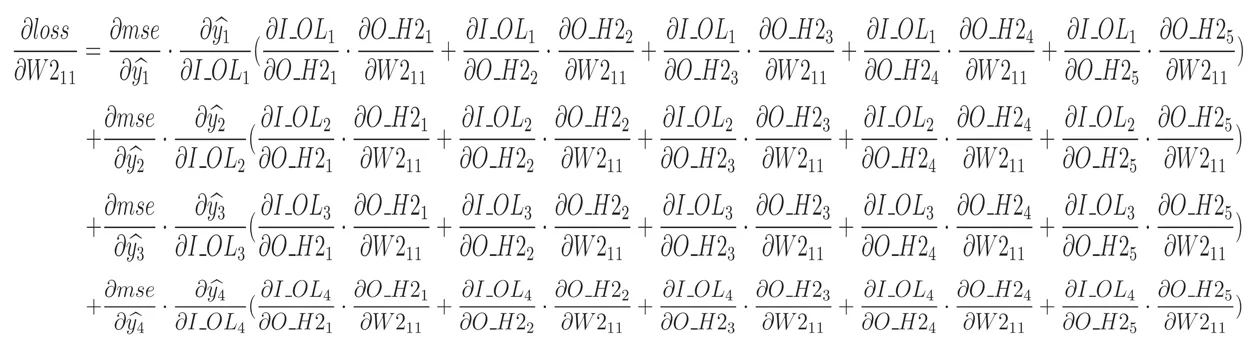

In [324]:
%%latex
\begin{gather*}
    \begin{align*}
        \text{we know that,} \\
    \end{align*}
    \\
    O\_H2_1 = f(I\_H2_1) \\
    O\_H2_2 = f(I\_H2_2) \\
    O\_H2_3 = f(I\_H2_3) \\
    O\_H2_4 = f(I\_H2_4) \\
    \\
    \begin{align*}
        \text{So, we can write}
    \end{align*}
\end{gather*}

<IPython.core.display.Latex object>

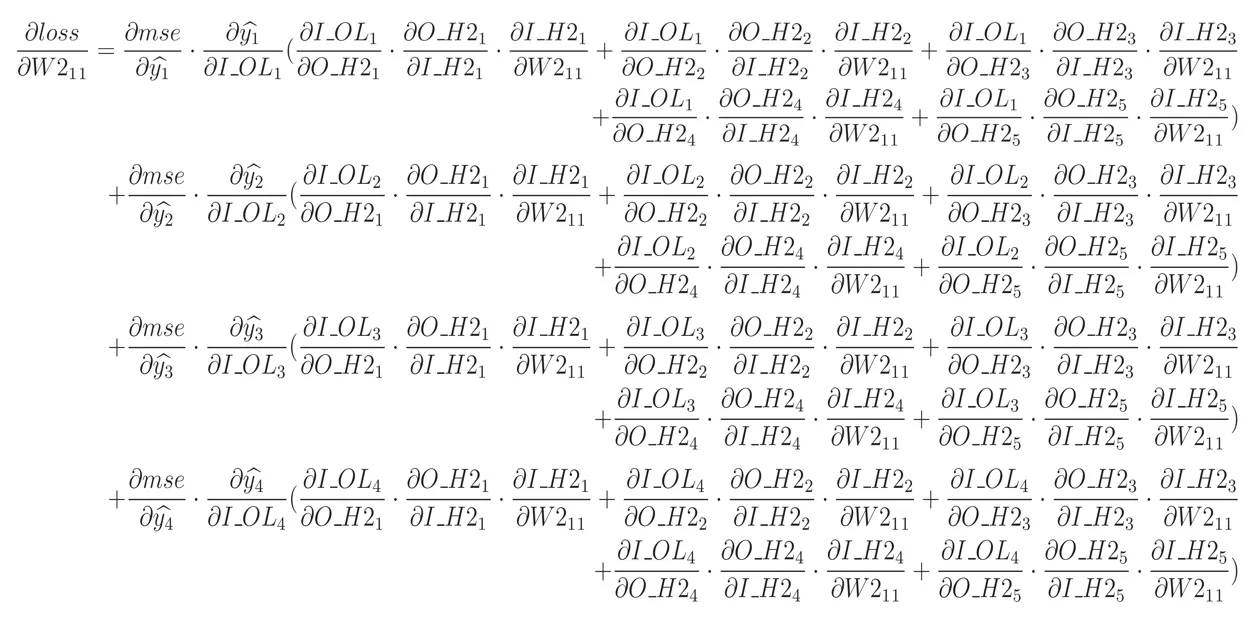

In [325]:
%%latex
\begin{gather*}
    \begin{align*}
        \text{we know that,}
    \end{align*}
     \\
    I\_H2_1 = O\_H1_1 \cdot W2_{11} + O\_H1_2 \cdot W2_{21} + O\_H1_3 \cdot W2_{31} + B2_1 \\
    \\
    I\_H2_2 = O\_H1_1 \cdot W2_{12} + O\_H1_2 \cdot W2_{22} + O\_H1_3 \cdot W2_{32} + B2_2 \\
    \\
    I\_H2_3 = O\_H1_1 \cdot W2_{13} + O\_H1_2 \cdot W2_{23} + O\_H1_3 \cdot W2_{33} + B2_3 \\
    \\
    I\_H2_4 = O\_H1_1 \cdot W2_{14} + O\_H1_2 \cdot W2_{24} + O\_H1_3 \cdot W2_{34} + B2_4 \\
    \\
    I\_H2_5 = O\_H1_1 \cdot W2_{15} + O\_H1_2 \cdot W2_{25} + O\_H1_3 \cdot W2_{35} + B2_5 \\
    \\
    \begin{align*}
        \text{So these terms are 0 (Zero)} \\
    \end{align*}
    \\
    \begin{alignat*}{5}
    \frac{\partial loss}{\partial W2_{11}} = \frac{\partial mse}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial I\_OL_1} ( \frac{\partial I\_OL_1}{\partial O\_H2_1} \cdot \frac{\partial O\_H2_1}{\partial I\_H2_1} \cdot \frac{\partial I\_H2_1}{\partial W2_{11}} + 
                                                                                                                                         \frac{\partial I\_OL_1}{\partial O\_H2_2} \cdot \frac{\partial O\_H2_2}{\partial I\_H2_2} \cdot \color{red} \frac{\partial I\_H2_2}{\partial W2_{11}} \color{white} +
                                                                                                                                         \frac{\partial I\_OL_1}{\partial O\_H2_3} \cdot \frac{\partial O\_H2_3}{\partial I\_H2_3} \cdot \color{red} \frac{\partial I\_H2_3}{\partial W2_{11}} \color{white} + \\
                                                                                                                                       + \frac{\partial I\_OL_1}{\partial O\_H2_4} \cdot \frac{\partial O\_H2_4}{\partial I\_H2_4} \cdot \color{red} \frac{\partial I\_H2_4}{\partial W2_{11}} \color{white} +
                                                                                                                                         \frac{\partial I\_OL_1}{\partial O\_H2_5} \cdot \frac{\partial O\_H2_5}{\partial I\_H2_5} \cdot \color{red} \frac{\partial I\_H2_5}{\partial W2_{11}} \color{white} ) + \\
                                           
                                           + \frac{\partial mse}{\partial \hat{y_2}} \cdot \frac{\partial \hat{y_2}}{\partial I\_OL_2} ( \frac{\partial I\_OL_2}{\partial O\_H2_1} \cdot \frac{\partial O\_H2_1}{\partial I\_H2_1} \cdot \frac{\partial I\_H2_1}{\partial W2_{11}} + 
                                                                                                                                         \frac{\partial I\_OL_2}{\partial O\_H2_2} \cdot \frac{\partial O\_H2_2}{\partial I\_H2_2} \cdot \color{red} \frac{\partial I\_H2_2}{\partial W2_{11}} \color{white} +
                                                                                                                                         \frac{\partial I\_OL_2}{\partial O\_H2_3} \cdot \frac{\partial O\_H2_3}{\partial I\_H2_3} \cdot \color{red} \frac{\partial I\_H2_3}{\partial W2_{11}} \color{white} + \\
                                                                                                                                       + \frac{\partial I\_OL_2}{\partial O\_H2_4} \cdot \frac{\partial O\_H2_4}{\partial I\_H2_4} \cdot \color{red} \frac{\partial I\_H2_4}{\partial W2_{11}} \color{white} +
                                                                                                                                         \frac{\partial I\_OL_2}{\partial O\_H2_5} \cdot \frac{\partial O\_H2_5}{\partial I\_H2_5} \cdot \color{red} \frac{\partial I\_H2_5}{\partial W2_{11}} \color{white} ) + \\
                                           
                                           + \frac{\partial mse}{\partial \hat{y_3}} \cdot \frac{\partial \hat{y_3}}{\partial I\_OL_3} ( \frac{\partial I\_OL_3}{\partial O\_H2_1} \cdot \frac{\partial O\_H2_1}{\partial I\_H2_1} \cdot \frac{\partial I\_H2_1}{\partial W2_{11}} + 
                                                                                                                                         \frac{\partial I\_OL_3}{\partial O\_H2_2} \cdot \frac{\partial O\_H2_2}{\partial I\_H2_2} \cdot \color{red} \frac{\partial I\_H2_2}{\partial W2_{11}} \color{white} +
                                                                                                                                         \frac{\partial I\_OL_3}{\partial O\_H2_3} \cdot \frac{\partial O\_H2_3}{\partial I\_H2_3} \cdot \color{red} \frac{\partial I\_H2_3}{\partial W2_{11}} \color{white} + \\
                                                                                                                                       + \frac{\partial I\_OL_3}{\partial O\_H2_4} \cdot \frac{\partial O\_H2_4}{\partial I\_H2_4} \cdot \color{red} \frac{\partial I\_H2_4}{\partial W2_{11}} \color{white} +
                                                                                                                                         \frac{\partial I\_OL_3}{\partial O\_H2_5} \cdot \frac{\partial O\_H2_5}{\partial I\_H2_5} \cdot \color{red} \frac{\partial I\_H2_5}{\partial W2_{11}} \color{white} ) + \\
                                           
                                           + \frac{\partial mse}{\partial \hat{y_4}} \cdot \frac{\partial \hat{y_4}}{\partial I\_OL_4} ( \frac{\partial I\_OL_4}{\partial O\_H2_1} \cdot \frac{\partial O\_H2_1}{\partial I\_H2_1} \cdot \frac{\partial I\_H2_1}{\partial W2_{11}} + 
                                                                                                                                         \frac{\partial I\_OL_4}{\partial O\_H2_2} \cdot \frac{\partial O\_H2_2}{\partial I\_H2_2} \cdot \color{red} \frac{\partial I\_H2_2}{\partial W2_{11}} \color{white} +
                                                                                                                                         \frac{\partial I\_OL_4}{\partial O\_H2_3} \cdot \frac{\partial O\_H2_3}{\partial I\_H2_3} \cdot \color{red} \frac{\partial I\_H2_3}{\partial W2_{11}} \color{white} + \\
                                                                                                                                       + \frac{\partial I\_OL_4}{\partial O\_H2_4} \cdot \frac{\partial O\_H2_4}{\partial I\_H2_4} \cdot \color{red} \frac{\partial I\_H2_4}{\partial W2_{11}} \color{white} +
                                                                                                                                         \frac{\partial I\_OL_4}{\partial O\_H2_5} \cdot \frac{\partial O\_H2_5}{\partial I\_H2_5} \cdot \color{red} \frac{\partial I\_H2_5}{\partial W2_{11}} \color{white} ) + \\
    \end{alignat*}
    \\
    \begin{align*}
        \text{We have} \\ 
    \end{align*}
    \\
    \frac{\partial loss}{\partial W2_{11}} = \frac{\partial mse}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial I\_OL_1} \cdot \frac{\partial I\_OL_1}{\partial O\_H2_1} \cdot \frac{\partial O\_H2_1}{\partial I\_H2_1} \cdot \frac{\partial I\_H2_1}{\partial W2_{11}}
                                           + \frac{\partial mse}{\partial \hat{y_2}} \cdot \frac{\partial \hat{y_2}}{\partial I\_OL_2} \cdot \frac{\partial I\_OL_2}{\partial O\_H2_1} \cdot \frac{\partial O\_H2_1}{\partial I\_H2_1} \cdot \frac{\partial I\_H2_1}{\partial W2_{11}} + \\
                                           + \frac{\partial mse}{\partial \hat{y_3}} \cdot \frac{\partial \hat{y_3}}{\partial I\_OL_3} \cdot \frac{\partial I\_OL_3}{\partial O\_H2_1} \cdot \frac{\partial O\_H2_1}{\partial I\_H2_1} \cdot \frac{\partial I\_H2_1}{\partial W2_{11}}
                                           + \frac{\partial mse}{\partial \hat{y_4}} \cdot \frac{\partial \hat{y_4}}{\partial I\_OL_4} \cdot \frac{\partial I\_OL_4}{\partial O\_H2_1} \cdot \frac{\partial O\_H2_1}{\partial I\_H2_1} \cdot \frac{\partial I\_H2_1}{\partial W2_{11}}   \\
    \\
    \begin{align*}
        \text{From this}
    \end{align*}
     \\
    \\
    I\_H2_1 = O\_H1_1 \cdot W2_{11} + O\_H1_2 \cdot W2_{21} + O\_H1_3 \cdot W2_{31} + B2_1 \\
    \\
    I\_H2_2 = O\_H1_1 \cdot W2_{12} + O\_H1_2 \cdot W2_{22} + O\_H1_3 \cdot W2_{32} + B2_2 \\
    \\
    I\_H2_3 = O\_H1_1 \cdot W2_{13} + O\_H1_2 \cdot W2_{23} + O\_H1_3 \cdot W2_{33} + B2_3 \\
    \\
    I\_H2_4 = O\_H1_1 \cdot W2_{14} + O\_H1_2 \cdot W2_{24} + O\_H1_3 \cdot W2_{34} + B2_4 \\
    \\
    I\_H2_5 = O\_H1_1 \cdot W2_{15} + O\_H1_2 \cdot W2_{25} + O\_H1_3 \cdot W2_{35} + B2_5 \\
    \\
    \begin{align*}
        \text{and this}
    \end{align*}
     \\
    I\_OL_1 = O\_H2_1 \cdot W3_{11} + O\_H2_2 \cdot W3_{21} + O\_H2_3 \cdot W3_{31} + O\_H2_4 \cdot W3_{41} + O\_H2_5 \cdot W3_{51} + B3_1  \\
        \\
    I\_OL_2 = O\_H2_1 \cdot W3_{12} + O\_H2_2 \cdot W3_{22} + O\_H2_3 \cdot W3_{32} + O\_H2_4 \cdot W3_{42} + O\_H2_5 \cdot W3_{52} + B3_2  \\
        \\
    I\_OL_3 = O\_H2_1 \cdot W3_{13} + O\_H2_2 \cdot W3_{23} + O\_H2_3 \cdot W3_{33} + O\_H2_4 \cdot W3_{43} + O\_H2_5 \cdot W3_{53} + B3_3  \\
        \\
    I\_OL_4 = O\_H2_1 \cdot W3_{14} + O\_H2_2 \cdot W3_{24} + O\_H2_3 \cdot W3_{34} + O\_H2_4 \cdot W3_{44} + O\_H2_5 \cdot W3_{54} + B3_4   \\
       \\
    \begin{align*}
        \text{we have}
    \end{align*}
    \\
    \frac{\partial loss}{\partial W2_{11}} = \frac{\partial mse}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial I\_OL_1} \cdot W3_{11} \cdot \frac{\partial O\_H2_1}{\partial I\_H2_1} \cdot O\_H1_1
                                           + \frac{\partial mse}{\partial \hat{y_2}} \cdot \frac{\partial \hat{y_2}}{\partial I\_OL_2} \cdot W3_{12} \cdot \frac{\partial O\_H2_1}{\partial I\_H2_1} \cdot O\_H1_1 + \\
                                           + \frac{\partial mse}{\partial \hat{y_3}} \cdot \frac{\partial \hat{y_3}}{\partial I\_OL_3} \cdot W3_{13} \cdot \frac{\partial O\_H2_1}{\partial I\_H2_1} \cdot O\_H1_1
                                           + \frac{\partial mse}{\partial \hat{y_4}} \cdot \frac{\partial \hat{y_4}}{\partial I\_OL_4} \cdot W3_{14} \cdot \frac{\partial O\_H2_1}{\partial I\_H2_1} \cdot O\_H1_1   \\
    \\
    \begin{align*}
        \text{or} \\
    \end{align*}
    \\
    \frac{\partial loss}{\partial W2_{11}} = (\frac{\partial mse}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial I\_OL_1} \cdot W3_{11} 
                                            + \frac{\partial mse}{\partial \hat{y_2}} \cdot \frac{\partial \hat{y_2}}{\partial I\_OL_2} \cdot W3_{12}
                                            + \frac{\partial mse}{\partial \hat{y_3}} \cdot \frac{\partial \hat{y_3}}{\partial I\_OL_3} \cdot W3_{13}
                                            + \frac{\partial mse}{\partial \hat{y_4}} \cdot \frac{\partial \hat{y_4}}{\partial I\_OL_4} \cdot W3_{14} ) \cdot \frac{\partial O\_H2_1}{\partial I\_H2_1} \cdot O\_H1_1   \\
    \\
\end{gather*}

<IPython.core.display.Latex object>

Like this, we can find every term in grad_w2 but I will not show you the monstrous matrix of grad_w2.

We will skip it and I will directly show you the reduced form, which is

In [326]:
%%latex
\begin{gather*}
    grad\_w2 = (error\_grad\_upto\_H2 \cdot sig\_dash(I\_H2)) \cdot O\_H1^T    
    \\
    \\
    \begin{align*}
        \text{You can see that the first term is from the first portion}
    \end{align*}
    \\
    \\
    \frac{\partial loss}{\partial W2_{11}} = \color{#6880a9} (\frac{\partial mse}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial I\_OL_1} \cdot W3_{11} 
                                            + \frac{\partial mse}{\partial \hat{y_2}} \cdot \frac{\partial \hat{y_2}}{\partial I\_OL_2} \cdot W3_{12}
                                            + \frac{\partial mse}{\partial \hat{y_3}} \cdot \frac{\partial \hat{y_3}}{\partial I\_OL_3} \cdot W3_{13}
                                            + \frac{\partial mse}{\partial \hat{y_4}} \cdot \frac{\partial \hat{y_4}}{\partial I\_OL_4} \cdot W3_{14} ) \color{white} \cdot \frac{\partial O\_H2_1}{\partial I\_H2_1} \cdot O\_H1_1   \\
    \\
    \\
    grad\_W2 = (\color{#6880a9} error\_grad\_upto\_H2 \color{white} \cdot sig\_dash(I\_H2)) \cdot O\_H1^T    \\
    \\
    \begin{align*}
        \text{The second term is from the second portion}
    \end{align*}
    \\
    \\
    \frac{\partial loss}{\partial W2_{11}} = (\frac{\partial mse}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial I\_OL_1} \cdot W3_{11} 
                                            + \frac{\partial mse}{\partial \hat{y_2}} \cdot \frac{\partial \hat{y_2}}{\partial I\_OL_2} \cdot W3_{12}
                                            + \frac{\partial mse}{\partial \hat{y_3}} \cdot \frac{\partial \hat{y_3}}{\partial I\_OL_3} \cdot W3_{13}
                                            + \frac{\partial mse}{\partial \hat{y_4}} \cdot \frac{\partial \hat{y_4}}{\partial I\_OL_4} \cdot W3_{14} ) \cdot \color{#6880a9} \frac{\partial O\_H2_1}{\partial I\_H2_1} \color{white} \cdot O\_H1_1   \\
    \\
    \\
    grad\_W2 = (error\_grad\_upto\_H2 \cdot \color{#6880a9} sig\_dash(I\_H2) \color{white}) \cdot O\_H1^T    \\
    \\
    \begin{align*}
        \text{and third or the last term is from the last portion}
    \end{align*}
    \\
    \\
    \frac{\partial loss}{\partial W2_{11}} = (\frac{\partial mse}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial I\_OL_1} \cdot W3_{11} 
                                            + \frac{\partial mse}{\partial \hat{y_2}} \cdot \frac{\partial \hat{y_2}}{\partial I\_OL_2} \cdot W3_{12}
                                            + \frac{\partial mse}{\partial \hat{y_3}} \cdot \frac{\partial \hat{y_3}}{\partial I\_OL_3} \cdot W3_{13}
                                            + \frac{\partial mse}{\partial \hat{y_4}} \cdot \frac{\partial \hat{y_4}}{\partial I\_OL_4} \cdot W3_{14} ) \cdot \frac{\partial O\_H2_1}{\partial I\_H2_1} \cdot \color{#6880a9} O\_H1_1 \color{white}\\
    \\
    \\
    grad\_W2 = (error\_grad\_upto\_H2 \cdot sig\_dash(I\_H2)) \cdot \color{#6880a9} O\_H1^T \color{white} \\
    \\
\end{gather*}

<IPython.core.display.Latex object>

Now the question is how to calculate ‘error_grad_upto_H2’ or how to sum all the gradients up to w3 and b3 into shape (-1, 1)

Actually, we did it when we derived the reduced form of gradients for w2 and b2.

I will show it to you.



In [327]:
%%latex
\begin{gather*}
    error\_grad\_upto\_H2 = sum (
    \newcommand{\arraystretch}{2}
    \begin{bmatrix*}
        \frac{\partial mse}{\partial \hat{y_1}} \\
        \frac{\partial mse}{\partial \hat{y_2}} \\
        \frac{\partial mse}{\partial \hat{y_3}} \\
        \frac{\partial mse}{\partial \hat{y_4}} \\ 
    \end{bmatrix*} * 
    \begin{bmatrix*}
        \frac{\partial \hat{y_1}}{\partial I\_OL_1} \\
        \frac{\partial \hat{y_2}}{\partial I\_OL_2} \\
        \frac{\partial \hat{y_3}}{\partial I\_OL_3} \\
        \frac{\partial \hat{y_4}}{\partial I\_OL_4} \\ 
    \end{bmatrix*} * 
    \begin{bmatrix*}
        W3_{11} & W3_{21} & W3_{31} & W3_{41} & W3_{51}\\
        W3_{12} & W3_{22} & W3_{32} & W3_{42} & W3_{52} \\
        W3_{13} & W3_{23} & W3_{33} & W3_{43} & W3_{53} \\
        W3_{14} & W3_{24} & W3_{34} & W3_{44} & W3_{54} \\ 
    \end{bmatrix*}, 
    axis = 0).reshape(-1,1) \\
    \\
    \\
    error\_grad\_upto\_H2 = sum (mse(y, \hat{y}) * sig\_dash(I\_OL) *W3, axis = 0).reshape(-1, 1)\\
    \\
\end{gather*}

<IPython.core.display.Latex object>

You can try to broadcast the loss gradient and the sigmoid derivative with the first column of w3 to get the first term in the gradient which we derived for w2₁₁.

It will be the same.

I will show you but not in somewhat clear form.

After broadcasting, we will have this  
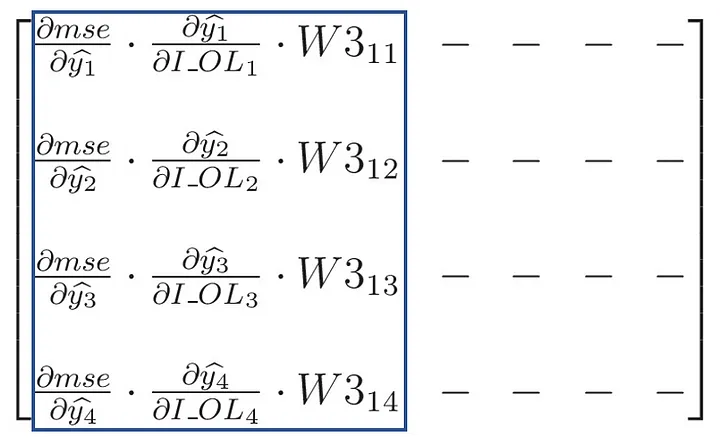


After taking sum along axis = 0 we will have something like this

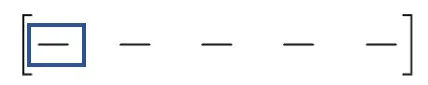

And, after reshaping it to (-1, 1) we will have this

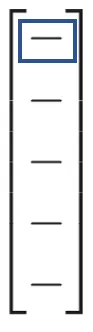

These reshaped gradients in shape (-1, 1) will have dot product with the transpose of O_H1 and the term in the blue box is actually the first term which we calculate for w2₁₁, i.e.,


In [328]:
%%latex
\begin{gather*}
    \frac{\partial mse}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial I\_OL_1} \cdot W3_{11} 
                                            + \frac{\partial mse}{\partial \hat{y_2}} \cdot \frac{\partial \hat{y_2}}{\partial I\_OL_2} \cdot W3_{12}
                                            + \frac{\partial mse}{\partial \hat{y_3}} \cdot \frac{\partial \hat{y_3}}{\partial I\_OL_3} \cdot W3_{13}
                                            + \frac{\partial mse}{\partial \hat{y_4}} \cdot \frac{\partial \hat{y_4}}{\partial I\_OL_4} \cdot W3_{14} 
\end{gather*}

<IPython.core.display.Latex object>

Like this, we can calculate the gradients for b2. But, we will use the help of a game which we developed called ‘Jumping Back’ and we have seen how to do it.

So, gradients for w2 and b2 are

In [329]:
error_grad_upto_H2 = np.sum(mse_grad(y, y_hat) * sig_dash(in_output_layer) * w3, axis = 0).reshape((-1, 1))
                                               # error grad upto H2  
  
grad_w2 = error_grad_upto_H2 * sig_dash(in_hidden_2).dot(out_hidden_1.T )
                                               # grad w2
grad_b2 = error_grad_upto_H2 * sig_dash(in_hidden_2)
                                               # grad b2

Now we will calculate gradients for w1 and b1, and for that, we will go through every step of the game ‘Jumping Back’.

But first, let us state some rules for the game ‘Jumping Back’  

> Rule 1 - If we cross a line, then we have to include the gradients  
> Rule 2 - After a jump, if the shape of gradients is not (-1, 1)
         then we will take sum along axis = 0 and then reshape it to (-1, 1)  

We can see that Rule 2 is used when we jump back across the weights.

In [330]:
%%latex
\begin{gather*}
    error\_grad\_upto\_H2 = sum (
    \newcommand{\arraystretch}{2}
    \begin{bmatrix*}
        \frac{\partial mse}{\partial \hat{y_1}} \\
        \frac{\partial mse}{\partial \hat{y_2}} \\
        \frac{\partial mse}{\partial \hat{y_3}} \\
        \frac{\partial mse}{\partial \hat{y_4}} \\ 
    \end{bmatrix*} * 
    \begin{bmatrix*}
        \frac{\partial \hat{y_1}}{\partial I\_OL_1} \\
        \frac{\partial \hat{y_2}}{\partial I\_OL_2} \\
        \frac{\partial \hat{y_3}}{\partial I\_OL_3} \\
        \frac{\partial \hat{y_4}}{\partial I\_OL_4} \\ 
    \end{bmatrix*} * 
    \begin{bmatrix*}
        W3_{11} & W3_{21} & W3_{31} & W3_{41} & W3_{51}\\
        W3_{12} & W3_{22} & W3_{32} & W3_{42} & W3_{52} \\
        W3_{13} & W3_{23} & W3_{33} & W3_{43} & W3_{53} \\
        W3_{14} & W3_{24} & W3_{34} & W3_{44} & W3_{54} \\ 
    \end{bmatrix*}, 
    axis = 0).reshape(-1,1) \\
\end{gather*}

<IPython.core.display.Latex object>

We have used rule 2 above.

So, let us calculate now the gradients for w1 and b1

We will start from the beginning for better understanding.

We start from true value ‘y’

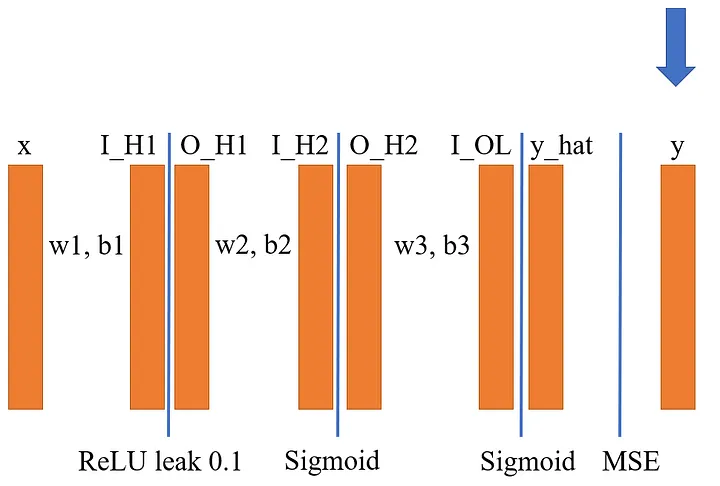

As we jump back, we will have a loss gradient in our gradient variable because we cross the loss line


In [331]:
%%latex
\begin{gather*}
    grad = mse(y, \hat{y})
\end{gather*}

<IPython.core.display.Latex object>

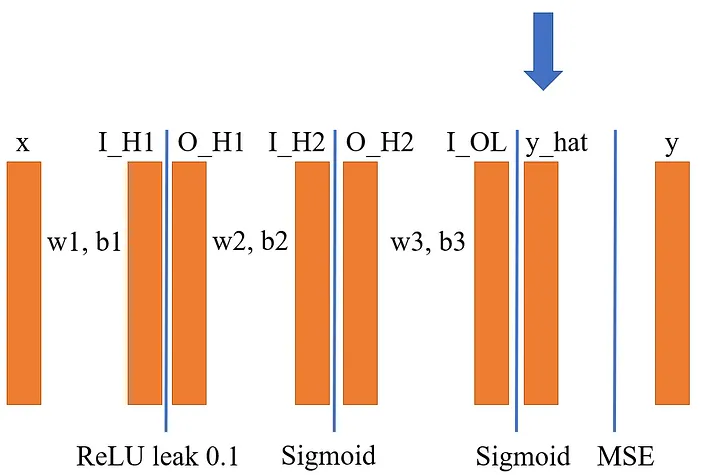  

Now we jump back crossing the sigmoid line. So, the gradient will now also have a sigmoid derivative

In [332]:
%%latex
\begin{gather*}
    grad = mse(y, \hat{y}) * sig\_dash(I\_OL)
\end{gather*}

<IPython.core.display.Latex object>

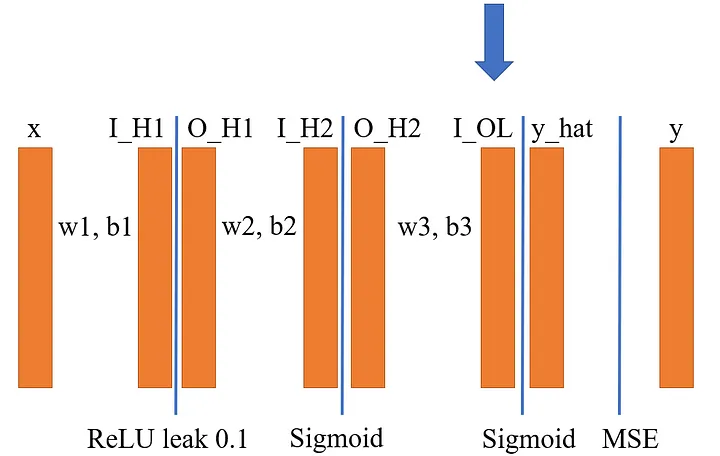


Now, we have reached w3 and b3, so gradients till now are used to update b3.

In [333]:
%%latex
\begin{gather*}
    grad\_B3 = mse(y, \hat{y}) * sig\_dash(I\_OL)
\end{gather*}

<IPython.core.display.Latex object>

and for weights w2, we will have dot product with whatever we have on the other end of weights.

In [334]:
%%latex
\begin{gather*}
    grad\_W3 = (mse(y, \hat{y}) * sig\_dash(I\_OL)) \cdot O\_H2^T
\end{gather*}

<IPython.core.display.Latex object>

In [335]:
grad_w3 = mse_grad(y, y_hat) * sig_dash(in_output_layer).dot(out_hidden_2.T )
                                                   # grad_w3 
               
grad_b3 = mse_grad(y, y_hat) * sig_dash(in_output_layer)
                                                   # grad_b3

Now if we jump back, we are crossing weights w3. We will sum all the gradients up to here in shape (-1, 1) after broadcasting the gradients up to I_OL with the weights w3

In [336]:
%%latex
\begin{gather*}
    error\_grad\_upto\_H2 = sum (mse(y, \hat{y}) * sig\_dash(I\_OL) *W3, axis = 0).reshape(-1, 1)\\
\\
\\
grad = error\_grad\_upto\_H2 \\
\end{gather*}

<IPython.core.display.Latex object>

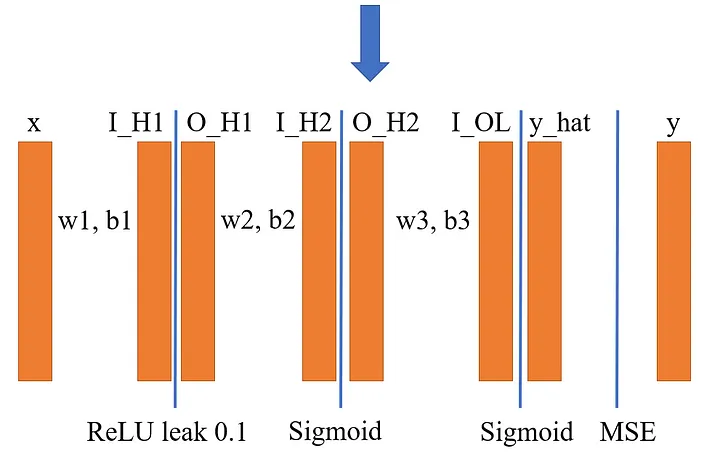  

As we jump back, we have crossed the sigmoid line so the gradients will have a sigmoid derivative.

In [337]:
%%latex
\begin{gather*}
\\
grad = error\_grad\_upto\_H2 * sig\_dash(I\_H2)\\
\end{gather*}

<IPython.core.display.Latex object>

And, for weights w2, we will have a dot product with whatever we have on the other end of the weights.

In [338]:
%%latex
\begin{gather*}
    grad\_W2 = error\_grad\_upto\_H2 * sig\_dash(I\_H2) \cdot O\_H1^T
\end{gather*}

<IPython.core.display.Latex object>

In [339]:
error_grad_upto_H2 = np.sum(mse_grad(y, y_hat) * sig_dash(in_output_layer) * w3, axis = 0).reshape((-1, 1))
                                               # error grad upto H2  
  
grad_w2 = error_grad_upto_H2 * sig_dash(in_hidden_2).dot(out_hidden_1.T )
                                               # grad w2
grad_b2 = error_grad_upto_H2 * sig_dash(in_hidden_2)
                                               # grad b2

Now if we jump back, we are crossing weights w2. We will sum all the gradients up to here in shape (-1, 1) after broadcasting the gradients up to I_H2 with the weights w2.

In [340]:
%%latex
\begin{gather*}
    error\_grad\_upto\_H1 = sum (error\_grad\_upto\_H2 * sig\_dash(I\_H2) * W2, axis = 0).reshape(-1, 1)\\
\\
\\
grad = error\_grad\_upto\_H1 \\
\end{gather*}

<IPython.core.display.Latex object>

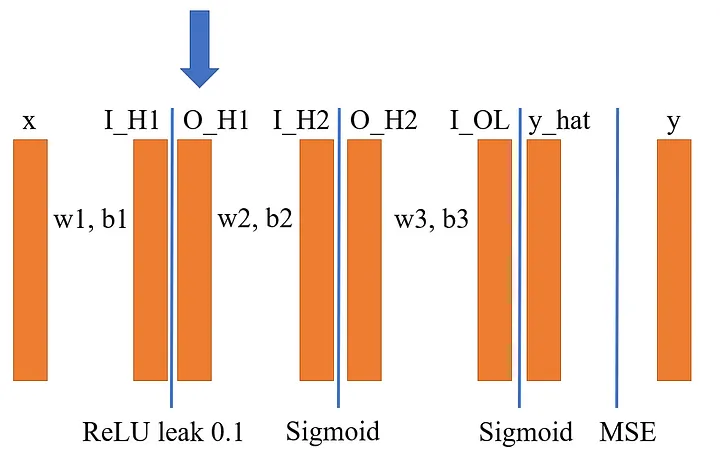

Now if we jump back, then we cross the ReLU activation line, so the gradients will have ReLU derivative in them

In [341]:
%%latex
\begin{gather*}
grad = error\_grad\_upto\_H1 * relu\_dash(I\_H1) \\
    \\

\end{gather*}

<IPython.core.display.Latex object>

Now we have reached w1 and <span style="color:red">b2</span>, so gradients till now are used to update b1

In [342]:
%%latex
\begin{gather*}
grad\_B1 = error\_grad\_upto\_H1 * relu\_dash(I\_H1) \\
\\
\end{gather*}

<IPython.core.display.Latex object>

and for weights w1, we will have a dot product with the transpose of whatever we have on the other end of weights.

In [343]:
%%latex
\begin{gather*}
    grad\_W1 = error\_grad\_upto\_H1 * relu\_dash(I\_H1) \cdot x^T
\end{gather*}

<IPython.core.display.Latex object>

In [344]:
error_grad_upto_H1 = np.sum(error_grad_upto_H2 * sig_dash(in_hidden_2) * w2, axis = 0).reshape((-1, 1))
                                               # error grad upto H1
    
grad_w1 = error_grad_upto_H1 * relu_dash(in_hidden_1, leak = 0.1).dot( x.T )
                                               # grad w1
    
grad_b1 = error_grad_upto_H1 * relu_dash(in_hidden_1, leak =0.1)
                                               # grad b1

### Step 3.3 — Using SGD Optimizer to update the weights and biases


In [345]:
# update_w1 = - learning_rate * grad_w1
# w1 += update_w1                                  # w1
    
# update_b1 = - learning_rate * grad_b1
# b1 += update_b1                                  # b1
    
# update_w2 = - learning_rate * grad_w2
# w2 += update_w2                                  # w2
    
# update_b2 = - learning_rate * grad_b2
# b2 += update_b2                                  # b2
    
# update_w3 = - learning_rate * grad_w3
# w3 += update_w3                                  # w3
    
# update_b3 = - learning_rate * grad_b3
# b3 += update_b3                                  # b3

This training procedure will happen epoch times, i.e., 10,000 times because epochs = 10,000

<span style="color:red">????????</span>

This is a small screenshot after the training.

### Step 4 — A forward feed to verify that the loss is reduced and to see how close predicted values are to true values

In [346]:
# in_hidden_1 = w1.dot(x) + b1                      # forward feed
# out_hidden_1 = relu(in_hidden_1, leak = 0.1)
# in_hidden_2 = w2.dot(out_hidden_1) + b2
# out_hidden_2 = sig(in_hidden_2)
# in_output_layer = w3.dot(out_hidden_2) + b3
# y_hat = sig(in_output_layer)
#                                            # predicted values


In [347]:
for epoch in range(epochs):
#----------------------Forward Propagation--------------------------
    
    in_hidden_1 = w1.dot(x) + b1
    out_hidden_1 = relu(in_hidden_1, leak = 0.1)
    in_hidden_2 = w2.dot(out_hidden_1) + b2
    out_hidden_2 = sig(in_hidden_2)
    in_output_layer = w3.dot(out_hidden_2) + b3
    y_hat = sig(in_output_layer)
    
    loss = mse(y, y_hat)
    print(f'loss before training is {loss} -- epoch number {epoch +1}')
    print('\n')
    
    update_w1 = - learning_rate * grad_w1
    w1 += update_w1                                  # w1
    
    update_b1 = - learning_rate * grad_b1
    b1 += update_b1                                  # b1
    
    update_w2 = - learning_rate * grad_w2
    w2 += update_w2                                  # w2
    
    update_b2 = - learning_rate * grad_b2
    b2 += update_b2                                  # b2
    
    update_w3 = - learning_rate * grad_w3
    w3 += update_w3                                  # w3
    
    update_b3 = - learning_rate * grad_b3
    b3 += update_b3    

loss before training is 0.1059625955371147 -- epoch number 1


loss before training is 0.10585968196673604 -- epoch number 2


loss before training is 0.10575667100629565 -- epoch number 3


loss before training is 0.10565356282227267 -- epoch number 4


loss before training is 0.10555035758220352 -- epoch number 5


loss before training is 0.10544705545468329 -- epoch number 6


loss before training is 0.10534365660936677 -- epoch number 7


loss before training is 0.10524016121696962 -- epoch number 8


loss before training is 0.10513656944926933 -- epoch number 9


loss before training is 0.10503288147910658 -- epoch number 10


loss before training is 0.10492909748038613 -- epoch number 11


loss before training is 0.104825217628078 -- epoch number 12


loss before training is 0.10472124209821827 -- epoch number 13


loss before training is 0.10461717106791053 -- epoch number 14


loss before training is 0.1045130047153264 -- epoch number 15


loss before training is 0.104408743219

In [348]:
y_hat

array([[9.45147368e-07],
       [5.71241725e-01],
       [7.51292959e-01],
       [3.63238692e-01]])

In [349]:
y                                                 # true values

array([[0.21],
       [0.83],
       [0.87],
       [0.75]])

In [350]:
mse(y, y_hat)                                     # loss

0.06868277972369977

In [352]:
in_hidden_1 = w1.dot(x) + b1                      # forward feed
out_hidden_1 = relu(in_hidden_1, leak = 0.1)
in_hidden_2 = w2.dot(out_hidden_1) + b2
out_hidden_2 = sig(in_hidden_2)
in_output_layer = w3.dot(out_hidden_2) + b3
y_hat = sig(in_output_layer)


In [357]:
y_hat                                             # predicted values


array([[2.07345321e-07],
       [8.29981546e-01],
       [8.69682236e-01],
       [7.50026885e-01]])

In [358]:
y                      

array([[0.21],
       [0.83],
       [0.87],
       [0.75]])

In [359]:
                           # true values
mse(y, y_hat)      

0.011025003738119965

Full code available in [26_backprop_code.ipynb](26_backprop_code.ipynb)


And finally, we have learned how to implement Backpropagation. I hope now you understand.

So, now you can apply Backpropagation in your Neural Networks with any number of layers with any number of nodes with any activation layer except the Softmax function.

Things are different with the Softmax function, which we will see in the next post.